# Setup

This section of code have 2 purposes: 

- Setup OpenAI API key and Google BigQuery
- Setup OpenAI Evals for evaluation 

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
import pandas_gbq


project = 'absolute-codex-379614' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()
!pip install --upgrade pip
!pip install openai
import openai
import requests
from bs4 import BeautifulSoup
import json
model_engine = "gpt-3.5-turbo"
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.0 MB/s eta 0:00:00


In [ ]:
!rm -r evals
!git clone https://github.com/phulelouch/evals.git

#You can start to replace evals/registry/modelgraded/fact.yaml with the below right around here if using newer version of EVALS 

"""
fact:
  prompt: |-
    You are comparing a submitted answer to an expert answer on a given question. Here is the data:
    [BEGIN DATA]
    ************
    [Question]: {question}
    ************
    [Expert]: {ideal}
    ************
    [Submission]: {input}
    ************
    [END DATA]

    Compare the factual content of the submitted answer with the expert answer. Ignore any differences in style, grammar, or punctuation.
    The submitted answer may either be a subset or superset of the expert answer, or it may conflict with it. Determine which case applies. Answer the question by selecting one of the following options:
    (A) The submitted answer is a subset of the expert answer and is fully consistent with it.
    (B) The submitted answer is a superset of the expert answer and is fully consistent with it.
    (C) The submitted answer contains all the same details as the expert answer.
    (D) There is a disagreement between the submitted answer and the expert answer.
    (E) The answers differ, but these differences don't matter from the perspective of factuality.
  choice_strings: ABCDE
  input_outputs:
    question: question_completion
"""

!cd evals; git lfs install
!cd evals; git lfs pull
!cd evals; pip install -e .

# !pip uninstall -y pyarrow 
# !pip install pyarrow==3.0.0


rm: cannot remove 'evals': No such file or directory
Cloning into 'evals'...
remote: Enumerating objects: 1053, done.
remote: Counting objects: 100% (530/530), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 1053 (delta 443), reused 411 (delta 411), pack-reused 523
Receiving objects: 100% (1053/1053), 371.66 KiB | 2.49 MiB/s, done.
Resolving deltas: 100% (555/555), done.
Filtering content: 100% (77/77), 119.95 MiB | 25.57 MiB/s, done.
Updated git hooks.
Git LFS initialized.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/evals
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s eta 0:00:0

In [ ]:
! cd evals; pip install evals

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset

In [ ]:
# #Create a new table to store all 
schema = [
    bigquery.SchemaField("id", "INTEGER"),
    bigquery.SchemaField("title", "STRING"),
    bigquery.SchemaField("body", "STRING"),
    bigquery.SchemaField("accepted_answer_id", "INTEGER"),
    bigquery.SchemaField("answer_count", "INTEGER"),
    bigquery.SchemaField("comment_count", "INTEGER"),
    bigquery.SchemaField("community_owned_date", "TIMESTAMP"),
    bigquery.SchemaField("creation_date", "TIMESTAMP"),
    bigquery.SchemaField("favorite_count", "INTEGER"),
    bigquery.SchemaField("last_activity_date", "TIMESTAMP"),
    bigquery.SchemaField("last_edit_date", "TIMESTAMP"),
    bigquery.SchemaField("last_editor_display_name", "STRING"),
    bigquery.SchemaField("last_editor_user_id", "INTEGER"),
    bigquery.SchemaField("owner_display_name", "STRING"),
    bigquery.SchemaField("owner_user_id", "INTEGER"),
    bigquery.SchemaField("parent_id", "INTEGER"),
    bigquery.SchemaField("post_type_id", "INTEGER"),
    bigquery.SchemaField("score", "INTEGER"),
    bigquery.SchemaField("tags", "STRING"),
    bigquery.SchemaField("view_count", "INTEGER"),
    bigquery.SchemaField("chatgpt_answer", "STRING"),
    bigquery.SchemaField("level", "STRING"),
    bigquery.SchemaField("label_type_of_problem", "STRING"),
    bigquery.SchemaField("eval1_result", "STRING"),
    bigquery.SchemaField("eval2_result", "STRING"),
]

# project_id = "absolute-codex-379614"  # Replace with your project ID
# client = bigquery.Client(project=project_id)
# dataset_id = "stackof_gptanswer" 
# dataset_ref = client.dataset(dataset_id)

# table_id = "evaluation"  # Replace with your desired table ID
# table_ref = dataset_ref.table(table_id)
# table = bigquery.Table(table_ref, schema=schema)
# _ = client.create_table(table)

# job_config = bigquery.LoadJobConfig()
# job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
# job_config.schema = schema



## Result set loaded from BigQuery job as a DataFrame

In [ ]:

# Construct a reference to the "stackoverflow" dataset
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

first_query = """
              SELECT
                q.id,
                q.title,
                q.body,
                q.accepted_answer_id,
                q.view_count,
                a.body AS stackoverflow_answer
              FROM
                bigquery-public-data.stackoverflow.posts_questions q
              LEFT JOIN
                `bigquery-public-data.stackoverflow.posts_answers` a
              ON
                q.accepted_answer_id = a.id
              WHERE
                q.answer_count > 0
                AND q.accepted_answer_id > 0
                AND EXTRACT(YEAR FROM q.creation_date) >= 2022
              LIMIT 1000
              OFFSET 0;
              """

results = client.query(first_query.format(offset=0)).result().to_dataframe()
print("Number of questions:", len(results))
results

# Evaluation 1: coqa-closedqa

Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

## Create a json test 

Now, we already have a full dataset, we will using OpenAI evals to doing evaluation. First we need to create a json dataset that look like this:

{"input":[{"role":"system","content":body[0:4095]}],"ideal":stackoverflow_answer}

1. Extracts the 'body' and 'stackoverflow_answer' columns from a DataFrame named 'results'.
2.Initializes an empty list called 'json_strings' to store JSON strings.
3.Iterates through the DataFrame rows, performing the following steps for each row:
  * Truncates the 'body' content to 4095 characters if needed.
  * Creates a JSON object with the desired structure, using 'body_content' and 'stackoverflow_answer' values.
  * Converts the JSON object into a string and appends it to the 'json_strings' list.
4. Writes the JSON strings to a file named 'samples.jsonl', with each JSON string on a separate line.

In [ ]:
def create_json(test_name):
  # Extract the necessary data from the DataFrame
  body = results['body']
  title = results['title']
  stackoverflow_answer = results['stackoverflow_answer']
  #chatgpt_answer = results['chatgpt_answer']
  

  # Create a list to store the JSON strings
  json_strings = []

  # Iterate through the DataFrame rows
  for i in range(len(results)):
      # Truncate the body content to 4095 characters if needed
      body_content = title[i]+(body[i] if body[i] else "None").replace("'", "\\'").replace('"', '\\"')
      #chatgpt_ans = (chatgpt_answer[i][:2000] if chatgpt_answer[i] else "None").replace("'", "\\'").replace('"', '\\"')
      stackoverflow_ans = (stackoverflow_answer[i] if stackoverflow_answer[i] else "None").replace("'", "\\'").replace('"', '\\"')


      # Create a JSON object with the desired structure
      json_object = {
            "input": body_content,
            #"input2": chatgpt_ans,
            "ideal": stackoverflow_ans
      }
      print(json_object)

      # Convert the JSON object to a string and append it to the list
      json_strings.append(json.dumps(json_object))

  filename = '/content/evals/evals/registry/data/{test_name}/expert/samples.jsonl'.format(test_name=test_name)
  # Save the JSON strings to a file, with newline characters between them
  with open(filename, "w") as outfile:
      outfile.write("\n".join(json_strings))


create_json('coqa')


## Running test 

- Step 1:
repalce samples.jsonl in the evals/evals/registry/data/coqa/expert


- Step 2:
oaieval gpt-3.5-turbo coqa-closedqa where [coqa-closedqa] is a template model

- Step 3: the result in /tmp/evallogs



In [ ]:
# EVALS_THREADS=40 EVALS_THREAD_TIMEOUT=60

In [ ]:
!export OPENAI_API_KEY=; oaieval gpt-3.5-turbo coqa-closedqa --record_path coqa-closedqa-expert.jsonl --log_to_file log_coqa-closedqa-expert.jsonl

100% 969/970 [50:54<00:03,  3.15s/it]
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/pool.py", line 853, in next
    item = self._items.popleft()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/oaieval", line 8, in <module>
    sys.exit(main())
  File "/content/evals/evals/cli/oaieval.py", line 248, in main
    run(args, model_resolver=ModelResolver())
  File "/content/evals/evals/cli/oaieval.py", line 225, in run
    result = eval.run(recorder)
  File "/content/evals/evals/elsuite/modelgraded/classify.py", line 323, in run
    self.eval_all_samples(recorder, samples)
  File "/content/evals/evals/eval.py", line 154, in eval_all_samples
    idx_and_result = list(tqdm(iter, total=len(work_items), disable=not show_progress))
  File "/usr/local/lib/python3.9/dist-packages/tqdm/std.py", line 1178, in __iter__
    for obj in iterable:
  File "/usr

## Result explain and analyze

* 'run_id': A unique identifier for the evaluation run (e.g., '230317125128ZLXSWN4C').
* 'event_id': A unique identifier for the evaluation event (e.g., 57).
* 'sample_id': A unique identifier for the sample being evaluated (e.g., 'coqa-closedqa.dev.1').
* 'type': The type of event (e.g., 'metrics').
* 'data': A dictionary containing evaluation criteria and their respective values. In this case, there are three criteria: 'relevance', 'conciseness', and 'correct', all of which have a value of 'Y' or 'N'.
* 'created_by': Information about the creator of the evaluation event (empty in this case).
* 'created_at': A timestamp indicating when the evaluation event was created (e.g., '2023-03-17 12:53:40.741512+00:00').

In [ ]:
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Read the JSONL file
file_path = 'coqa-closedqa-expert.jsonl'
json_data = read_jsonl(file_path)

# metrics_items = [item for item in json_data if item.get('type') == 'metrics']

filtered_data = [{'sample_id': int(item['sample_id'].replace('coqa-closedqa.dev.','')), 'choice': str(item['data'])}
                 for item in json_data if item.get('type') == 'metrics']

# Create a DataFrame with the extracted data
metrics_df = pd.DataFrame(filtered_data)
metrics_df.set_index('sample_id', inplace=True)
metrics_df[['Relevance', 'Conciseness', 'Correct']] = metrics_df['choice'].apply(lambda x: pd.Series(json.loads(x.replace("'", "\""))))
metrics_df.drop('choice', axis=1, inplace=True)
metrics_df = metrics_df.loc[~metrics_df.index.duplicated(keep='first')]
print(len(metrics_df))
metrics_df


953


,Relevance,Conciseness,Correct
sample_id,,,
627,N,Y,Y
767,Y,Y,Y
717,Y,Y,Y
491,N,Y,Y
699,Y,Y,Y
...,...,...,...
89,Y,Y,Y
53,Y,Y,Y
272,Y,Y,Y


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The label '__invalid__' of <BarContainer object of 3 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


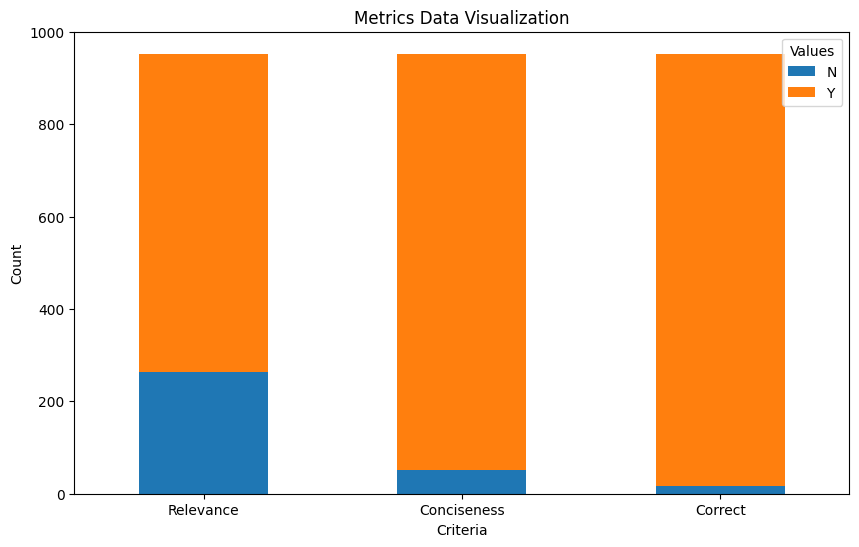

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart to represent the data
ax = metrics_df.apply(pd.value_counts).T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
ax.set_xlabel('Criteria')
ax.set_ylabel('Count')
ax.set_title('Metrics Data Visualization')
ax.legend(title='Values', loc='upper right')
plt.xticks(rotation=0)

# Show the chart
plt.show()

## Merge metrics results with results (aka merge ChatGPT's answer into main dataframe)

In [ ]:
def mergedf(df1,df2):
    # Create a copy of the 'metrics_df' DataFrame
  metrics_df_copy = df2.copy()

  # Reset the index of the 'metrics_df_copy' DataFrame
  # metrics_df_copy = metrics_df_copy.reset_index()

  # Merge the dataframes based on the 'sample_id' and index values
  merged_df = df1.merge(metrics_df_copy, left_index=True, right_on='sample_id')

  # # Set 'sample_id' as the index
  # merged_df = merged_df.set_index('sample_id')

  # # Remove columns with all null values
  # merged_df = merged_df.dropna(axis='columns', how='all')

  # # Remove columns with duplicate values
  # merged_df = merged_df.loc[:, ~merged_df.T.duplicated(keep='first').T]

  return merged_df


In [ ]:

results = mergedf(results,metrics_df)
# results = results.loc[:, ~results.T.duplicated(keep='first').T]
results

##Read Answer

In [ ]:
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Read the JSONL file
file_path = 'coqa-closedqa-expert.jsonl'
json_data = read_jsonl(file_path)

filtered_data = [
    {
        'sample_id': int(item['sample_id'].replace('coqa-closedqa.dev.', '')),
        'sampled': item['data']['sampled']
    }
    for item in json_data
    if item.get('type') == 'sampling' and item['data']['prompt'][0]['role'] == 'system'
]


# Create a DataFrame with the extracted data
samples_df = pd.DataFrame(filtered_data)
samples_df.set_index('sample_id', inplace=True)
#samples_df = samples_df.drop_duplicates()
samples_df = samples_df.loc[~samples_df.index.duplicated(keep='first')]

print(len(samples_df))
samples_df

957


,sampled
sample_id,
627,"Yes, it is possible to watch a certain transac..."
717,"The issue here is that ""set"" is a reserved key..."
491,"Yes, you can add the `HARS-X` part to the grok..."
767,"Based on the information provided, the third o..."
699,"Yes, you can create a search filter for HTML e..."
...,...
787,One approach to achieve this behavior is to us...
272,"To send data to a server using Remix, you can ..."
53,You need to copy the service file to the corre...


In [ ]:
# #add to results dataframe
# answer_df = samples_df

# # # Combine the results into a single string for each row
# # eval1_df['eval1_result'] = eval1_df.apply(lambda row: f"{row['criteria=relevance']},{row['criteria=conciseness']},{row['criteria=correct']}", axis=1)

# #Drop the original columns
# answer_df=answer_df.rename(columns={'sampled': 'chatgpt_answer'})

# if 'chatgpt_answer' in results.columns:
#     results = results.drop('chatgpt_answer', axis=1)

# # Make sure the number of rows in both DataFrames is the same
# if len(results) == len(answer_df):
#     # Add the 'eval1_result' column to the result_df DataFrame
#     results = pd.concat([results, answer_df['chatgpt_answer']], axis=1)
# else:
#     print("The number of rows in both DataFrames is not the same, cannot perform the operation")

# results



samples_df=samples_df.rename(columns={'sampled': 'chatgpt_answer'})
if 'chatgpt_answer' in results.columns:
    results = results.drop('chatgpt_answer', axis=1)
    
results = mergedf(results,samples_df)
# results = results.loc[:, ~results.T.duplicated(keep='first').T]
print(len(results))
results


## Upload the result to DBS



In [ ]:
# !pip uninstall -y pyarrow 
# !pip install pyarrow==3.0.0

In [ ]:


# project_id = "absolute-codex-379614"  # Replace with your project ID
# client = bigquery.Client(project=project_id)
# dataset_id = "stackof_gptanswer" 
# dataset_ref = client.dataset(dataset_id)
# table_id = "evaluation"
# table_ref = dataset_ref.table(table_id)
# # Upload the new DataFrame (new_data_df) to the BigQuery table
# job_config = bigquery.LoadJobConfig()
# job_config.autodetect = True
# job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND
# job_config.schema_update_options = [bigquery.SchemaUpdateOption.ALLOW_FIELD_ADDITION]

# # Define the schema variable here or use an existing schema definition
# # For example: schema = [bigquery.SchemaField("column_name", "STRING", mode="NULLABLE"), ...]

# job = client.load_table_from_dataframe(results, table_ref, job_config=job_config, location="US")

# job.result()  # Wait for the job to complete


# Evaluation 2: coqa-fact
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

## Create a json test 

Now, we already have a full dataset, we will using OpenAI evals to doing evaluation. First we need to create a json dataset that look like this:

{"input":[{"role":"system","content":body[0:4095]}],"ideal":stackoverflow_answer}

1. Extracts the 'body' and 'stackoverflow_answer' columns from a DataFrame named 'results'.
2.Initializes an empty list called 'json_strings' to store JSON strings.
3.Iterates through the DataFrame rows, performing the following steps for each row:
  * Truncates the 'body' content to 4095 characters if needed.
  * Creates a JSON object with the desired structure, using 'body_content' and 'stackoverflow_answer' values.
  * Converts the JSON object into a string and appends it to the 'json_strings' list.
4. Writes the JSON strings to a file named 'samples.jsonl', with each JSON string on a separate line.

In [ ]:
from bs4 import BeautifulSoup

def create_json(test_name):
  # Extract the necessary data from the DataFrame
  body = results['body']
  title = results['title']
  stackoverflow_answer = results['stackoverflow_answer']
  chatgpt_answer = results['chatgpt_answer']

  # Create a list to store the JSON strings
  json_strings = []

  # Iterate through the DataFrame rows
  for i in range(len(results)):
    try:
      # Truncate the body content to 4095 characters if needed
      body_content = title[i] + (BeautifulSoup(body[i], "html.parser").get_text() if body[i] else "None")#.replace("'", "\\'").replace('"', '\\"')
      chatgpt_answer_content = (BeautifulSoup(chatgpt_answer[i], "html.parser").get_text()  if chatgpt_answer[i] else "None")#.replace("'", "\\'").replace('"', '\\"')
      stackoverflow_answer_content = (BeautifulSoup(stackoverflow_answer[i], "html.parser").get_text()  if stackoverflow_answer[i] else "None")#.replace("'", "\\'").replace('"', '\\"')


      # Create a JSON object with the desired structure
      json_object = {
          "input": chatgpt_answer_content,
          "question": body_content,
          "ideal": stackoverflow_answer_content
      }

      # Print the JSON object to verify its structure
      print(json_object)

      # Convert the JSON object to a string and append it to the list
      json_strings.append(json.dumps(json_object))

      # Print the JSON string to verify its structure
      print(json_strings[-1])
    except:
      continue

  filename = '/content/evals/evals/registry/data/{test_name}/fact/samples.jsonl'.format(test_name=test_name)
  # Save the JSON strings to a file, with newline characters between them
  with open(filename, "w") as outfile:
      outfile.write("\n".join(json_strings))


create_json('coqa')


## Running test 

- Step 1:
repalce samples.jsonl in the evals/evals/registry/data/coqa


- Step 2:
oaieval gpt-3.5-turbo coqa-closedqa where [coqa-closedqa] is a template model

- Step 3: the result in /tmp/evallogs



In [ ]:
!export OPENAI_API_KEY=; oaieval gpt-3.5-turbo coqa-fact --record_path coqa-fact.jsonl --log_to_file log_coqa-fact.jsonl

100% 937/937 [21:02<00:00,  1.35s/it]


## Result explain and analyze

* 'run_id': A unique identifier for the evaluation run (e.g., '230317125128ZLXSWN4C').
* 'event_id': A unique identifier for the evaluation event (e.g., 57).
* 'sample_id': A unique identifier for the sample being evaluated (e.g., 'coqa-closedqa.dev.1').
* 'type': The type of event (e.g., 'metrics').
* 'data': A dictionary containing evaluation criteria and their respective values. 


        1. (A) The submitted answer is a subset of the expert answer and is fully consistent with it.
        2. (B) The submitted answer is a superset of the expert answer and is fully consistent with it.
        3. (C) The submitted answer contains all the same details as the expert answer.
        4. (D) There is a disagreement between the submitted answer and the expert answer.
        5. (E) The answers differ, but these differences don't matter from the perspective of factuality.
        
* 'created_by': Information about the creator of the evaluation event (empty in this case).
* 'created_at': A timestamp indicating when the evaluation event was created (e.g., '2023-03-17 12:53:40.741512+00:00').

In [ ]:

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

# Read the JSONL file
file_path = 'coqa-fact.jsonl'
json_data = read_jsonl(file_path)

filtered_data = [{'sample_id': int(item['sample_id'].replace('coqa-fact.dev.','')), 'choice': str(item['data']['choice'])}
                 for item in json_data if item.get('type') == 'metrics']

# Create a DataFrame with the extracted data
metrics_df = pd.DataFrame(filtered_data)
metrics_df.set_index('sample_id', inplace=True)
metrics_df = metrics_df.loc[~metrics_df.index.duplicated(keep='first')]

print(len(metrics_df))
metrics_df

930


,choice
sample_id,
818,B
568,B
316,A
468,A
81,D
...,...
417,A
787,B
89,A


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The label '__invalid__' of <BarContainer object of 1 artists> starts with '_'. It is thus excluded from the legend.
  ax.legend(handles, labels, loc="best", title=title)


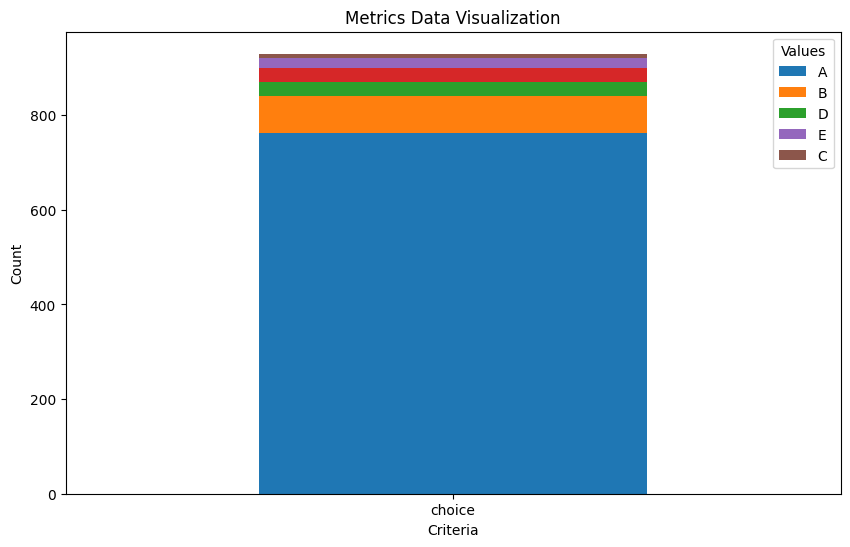

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart to represent the data
ax = metrics_df.apply(pd.value_counts).T.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
ax.set_xlabel('Criteria')
ax.set_ylabel('Count')
ax.set_title('Metrics Data Visualization')
ax.legend(title='Values', loc='upper right')
plt.xticks(rotation=0)

# Show the chart
plt.show()

## Merge metrics results with results

In [ ]:

results = mergedf(results,metrics_df)
# results = results.loc[:, ~results.T.duplicated(keep='first').T]
results.head(1)

,id,title,body,accepted_answer_id,view_count,stackoverflow_answer,Relevance,Conciseness,Correct,chatgpt_answer,choice
sample_id,,,,,,,,,,,
0,71961397,Symfony 6.0 time format problem database upload,<p>There were some problems with symfony over ...,71961458,86,"<p>The <a href=""https://www.php.net/manual/en/...",Y,Y,Y,The error message suggests that there is an is...,E


In [ ]:
cols_to_remove = [col for col in results.columns if 'sample_id' in col]
results = results.drop(columns=cols_to_remove)
results

## Upload the result to DBS



In [ ]:
# !pip uninstall -y pyarrow 
# !pip install pyarrow==3.0.0
!pip install pandas-gbq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyarrow-9.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.3 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1


In [ ]:

# Set your Google Cloud project ID
project_id = "absolute-codex-379614" 

# Set the dataset ID and table ID for the destination table
dataset_id = 'stackof_gptanswer'
table_id = 'evaluation'

# Create a sample DataFrame
df = results.copy()

# Set the destination table in the format 'dataset_id.table_id'
destination_table = f"{dataset_id}.{table_id}"

# Upload the DataFrame to BigQuery
pandas_gbq.to_gbq(df, destination_table, project_id=project_id, if_exists='append')

100%|██████████| 1/1 [00:00<00:00, 1602.10it/s]


# Result of both test analyze

In [ ]:
QUERY = "SELECT * FROM `absolute-codex-379614.stackof_gptanswer.evaluation` LIMIT 1000"

results = client.query(QUERY).result().to_dataframe()
print("Number of answer:", len(results))
results.head(1)

Number of answer: 1000


,id,title,body,accepted_answer_id,view_count,stackoverflow_answer,Relevance,Conciseness,Correct,chatgpt_answer,choice,sample_id
0,71624658,What is this weird output after using pointer ...,<p>My goal in the code is to parse some sort o...,71625142,65,<p>A couple of problems in your code:</p>\n<ul...,N,N,N,There are a few issues with your code:\n\n1. I...,A,46


In [ ]:
df = results.copy()

In [ ]:
columns = ['Relevance', 'Correct', 'Conciseness']

## Coqa-fact

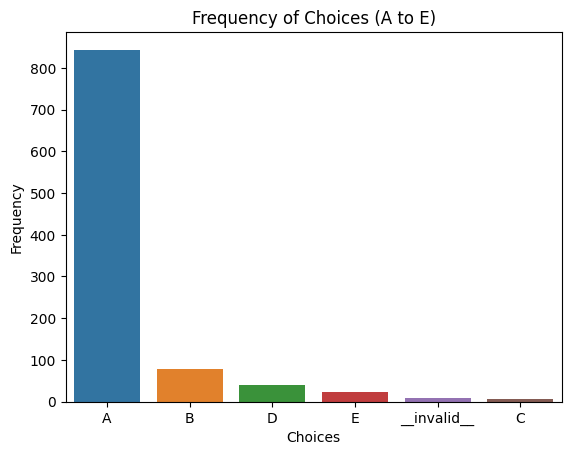

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

choice_counts = df['choice'].value_counts()
sns.barplot(x=choice_counts.index, y=choice_counts.values)
plt.xlabel('Choices')
plt.ylabel('Frequency')
plt.title('Frequency of Choices (A to E)')
plt.show()

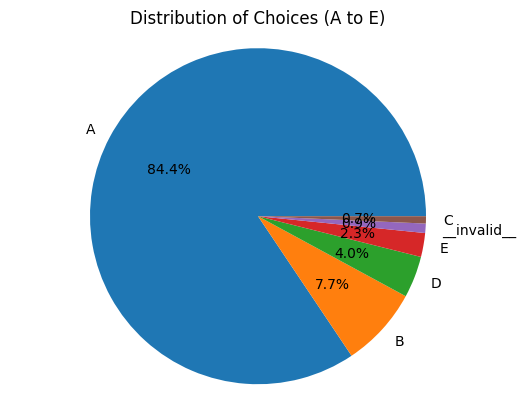

In [ ]:
choice_counts = df['choice'].value_counts()
plt.pie(choice_counts, labels=choice_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Choices (A to E)')
plt.show()

```
(A) The submitted answer is a subset of the expert answer and is fully consistent with it.
(B) The submitted answer is a superset of the expert answer and is fully consistent with it.
(C) The submitted answer contains all the same details as the expert answer.
(D) There is a disagreement between the submitted answer and the expert answer.
(E) The answers differ, but these differences don't matter from the perspective of factuality.
```

## Coqa-closedqa

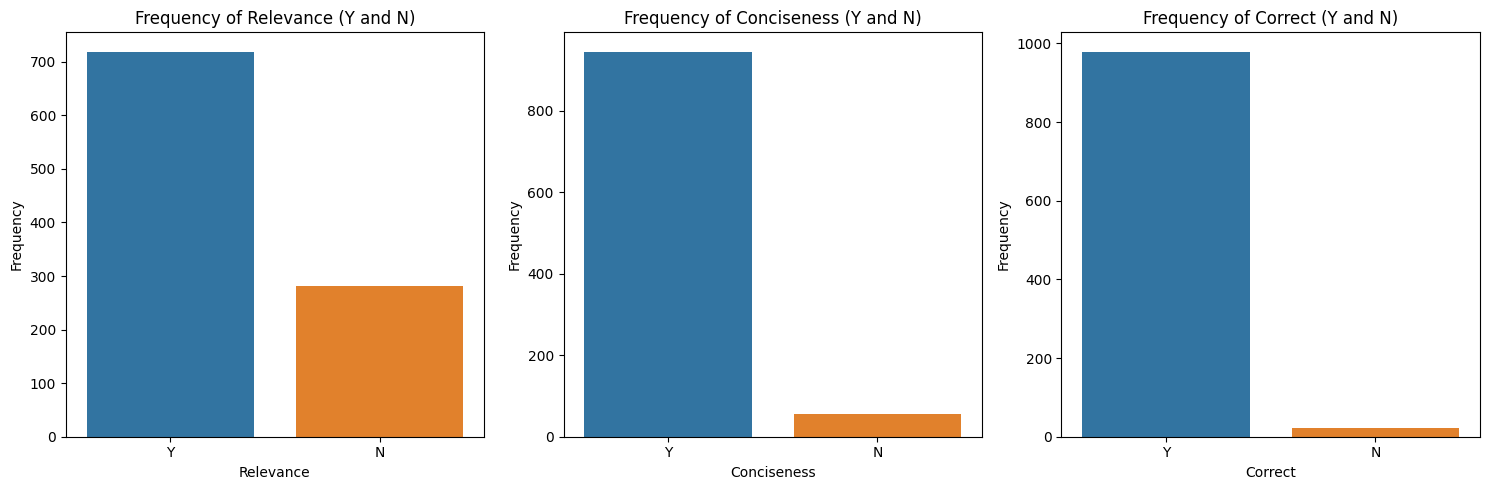

In [ ]:

columns = ['Relevance', 'Conciseness', 'Correct']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, col in enumerate(columns):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Frequency of {col} (Y and N)')

plt.tight_layout()
plt.show()


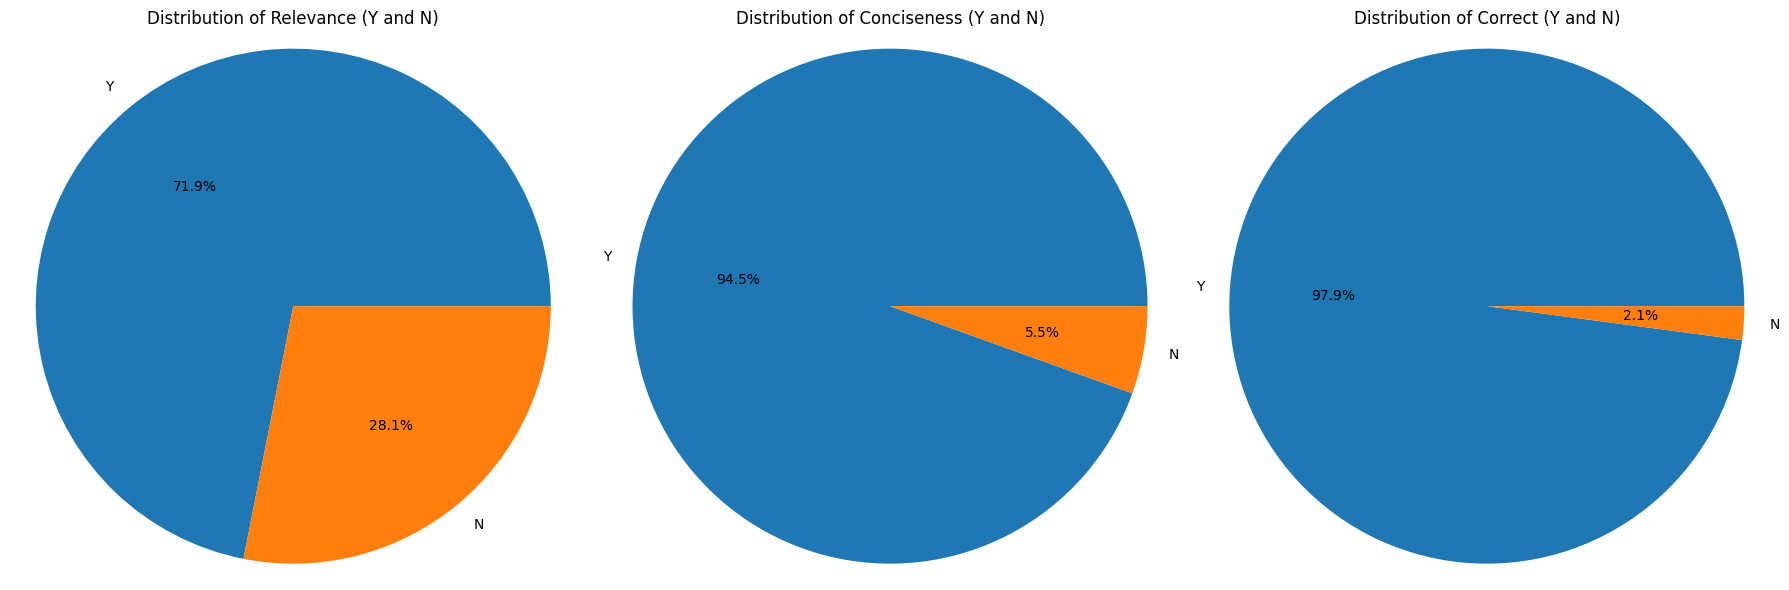

In [ ]:

def pie_chart(df, col, ax):
    counts = df[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_title(f'Distribution of {col} (Y and N)')

columns = ['Relevance', 'Conciseness', 'Correct']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, col in enumerate(columns):
    pie_chart(df, col, axes[idx])

plt.tight_layout()
plt.show()


# Export markdown for human evaluation

In [ ]:
import pandas as pd

# Read the dataframe from the CSV file
df = results.copy()

# Function to generate markdown output for each row
def generate_markdown(index, row):
    markdown = f"""
_____________________________________________________________________________________
<h2> EXAMPLE {index} - ID: {row['id']} </h2>

| Relevance | Correct | Conciseness | choice |   
|-----------|---------|-------------|--------|
| {row['Relevance']}         | {row['Correct']}       | {row['Conciseness']}           | {row['choice']}      |  

<b>[QUESTION] </b>
{row['body']}

<b>[ANSWER 1]</b>
{row['stackoverflow_answer']}

<b>[ANSWER 2]</b>
{row['chatgpt_answer']}
"""
    return markdown

# Function to generate file header
def generate_file_header():
    header = f"""# Is the first response better than the second?

| Index | ID | Results | Comment (why you think x answer is better?) |
|-------|----|---------|--------------------------------------------|
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
|       |    |         |                                            |
"""


    return header

# Initialize variables
file_counter = 8
question_counter = 0
output_file = open(f"{file_counter}.md", "w")
output_file.write(generate_file_header())

# Generate markdown for each row and save to a markdown file
for index, row in df.iterrows():
    if question_counter == 10:
        output_file.close()
        file_counter += 1
        question_counter = 0
        output_file = open(f"{file_counter}.md", "w")
        output_file.write(generate_file_header())
        
    markdown = generate_markdown(index, row)
    output_file.write(markdown)
    question_counter += 1

output_file.close()
